In [106]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import random
import time as tm
from scipy.optimize import curve_fit

In [107]:
successes = []
with open("/Users/williamquinn/Desktop/matrix.txt", 'r') as read_file:
    fl = read_file.readlines()
    for i, line in enumerate(fl):
        if i == 0:
            continue
        line_list = line.split(",")
        successes.append(float(line_list[0].strip()))
successes = np.array(successes)

In [108]:
in_apulse_times = []
out_apulse_times = []
with open("/Users/williamquinn/Desktop/apulses_processed.txt", 'r') as read_file:
    fl = read_file.readlines()
    for i, line in enumerate(fl):
        if i < 100:
            continue
        line_list = line.split("<apulse times>")[-1].split("<apulse amplitudes>")
        tims = line_list[0].split(" ")
        tims_ = []
        amps = line_list[1].split(" ")
        for j in range(len(tims)):
            if tims[j] == '':
                continue
            else:
                tims_.append(float(tims[j]))
        out_apulse_times.append(tims_)
with open("/Users/williamquinn/Desktop/apulses.txt", 'r') as read_file:
    fl = read_file.readlines()
    for i, line in enumerate(fl):
        if i < 100:
            continue
        line_list = line.split("<apulse times>")[-1].split("<apulse amplitudes>")
        tims = line_list[0].split(" ")
        tims_ = []
        amps = line_list[1].split(" ")
        for j in range(len(tims)):
            if tims[j] == '':
                continue
            else:
                tims_.append(float(tims[j]))
        in_apulse_times.append(tims_)

In [234]:
rows = []
successes = [0 for i in range(20)]
failures = [0 for i in range(20)]
n = 20
for i in range(n):
    success = 0
    failure = 0
    row = [0 for l in range(n)]
    for j in range(1000):
        k = j + i*1000
        
        in_num = len(in_apulse_times[k])
        out_num = len(out_apulse_times[k])
        
        if in_num != out_num:
            failure += 1
        else:
            success += 1
        
        if in_num > n:
            continue
        
        row[out_num] += 1
    successes[i] = (success/1000) *100
    failures[i] = (failure/1000) *100
      
    rows.append(np.array(row)/1000)

rows = np.array(rows)
print(len(rows))

20


Warning in <TFile::Append>: Replacing existing TH1: hist2d (Potential memory leak).


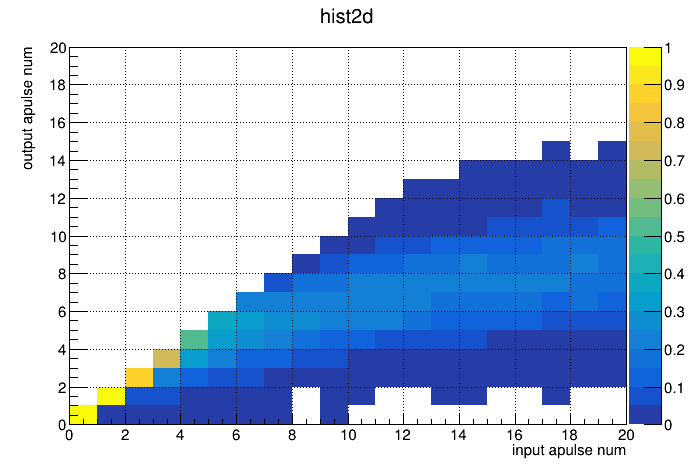

In [235]:
c1 = ROOT.TCanvas()
ROOT.gStyle.SetOptStat(0)
hist2d = ROOT.TH2F("hist2d", "hist2d", n, 0, n, n, 0, n)
for i in range(n):
    for j in range(n):
        hist2d.SetBinContent(i+1,j+1,rows[i][j])
c1.cd()
hist2d.Draw("colz")
hist2d.GetXaxis().SetTitle("input apulse num")
hist2d.GetYaxis().SetTitle("output apulse num")
c1.SetGrid()
c1.Draw()

In [236]:
def func(x, C, B):
    e = np.exp(-(x - C)/B)
    return e/(1+e)

4.2126010568655285 1.169299104754944 0.0003759638609385119

****************************************
Minimizer is Minuit / Migrad
Chi2                      =   0.00676735
NDf                       =           18
Edm                       =  2.60698e-08
NCalls                    =           65
p0                        =       4.2126   +/-   0.050798     	 (limited)
p1                        =       1.1693   +/-   0.0418141    	 (limited)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: sim


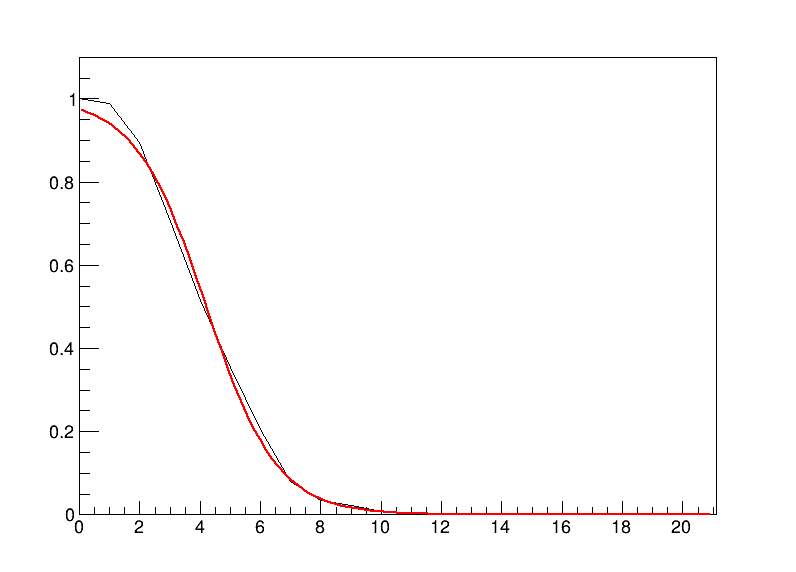

In [237]:
c = ROOT.TCanvas("sim","",800,600)
lower = 0
higher = 21
bin_width_0 = 1
low_bin = int(lower / bin_width_0)
high_bin = int(higher / bin_width_0)
n_bins = 21
graph = ROOT.TGraph()

for i in range(len(successes)):
    graph.AddPoint(i, successes[i]/100)
graph.GetXaxis().SetRangeUser(lower, higher)

fit = ROOT.TF1("fit",
               "exp(-(x-[0])/[1])/(1 + exp(-(x-[0])/[1]))",
               lower, higher)

fit.SetParNames("p0", "p1")

# fit.SetParLimits(0, 0, 1)
fit.SetParLimits(0, 0, 20)
fit.SetParLimits(1, 0, 20)
fit.SetParameters((higher+lower)/2, 2, 15)

graph.Fit("fit", "S", "", lower, higher)
graph.Draw()

c.Update()
c.Draw()

p0 = fit.GetParameter(0)
p0_err = fit.GetParError(0)
p1 = fit.GetParameter(1)
p1_err = fit.GetParError(1)
chi = fit.GetChisquare()/fit.GetNDF()
print(p0, p1, chi)

TFile**		/Users/williamquinn/Desktop/SNEMO/200320_A1400_B1400_t0929_output.root	
 TFile*		/Users/williamquinn/Desktop/SNEMO/200320_A1400_B1400_t0929_output.root	
  KEY: TH1D	200320_GAO607_charge_spectrum_1400V;1	200320_GAO607_charge_spectrum_1400V
  KEY: TH1D	200320_GAO607_amplitude_spectrum_1400V;1	200320_GAO607_amplitude_spectrum_1400V
  KEY: TH1D	200320_GAO607_baseline_distribution_1400V;1	200320_GAO607_baseline_distribution_1400V
  KEY: TH1I	200320_GAO607_apulse_num_1400V;1	200320_GAO607_apulse_num_1400V
  KEY: TH1I	200320_GAO607_apulse_times_1400V;1	200320_GAO607_apulse_times_1400V
  KEY: TH1D	200320_GAO607_apulse_amplitudes_1400V;1	200320_GAO607_apulse_amplitudes_1400V
  KEY: TH1I	200320_GAO607_he_apulse_num_1400V;1	200320_GAO607_he_apulse_num_1400V
  KEY: TH1D	200320_GAO607_he_apulse_amplitudes_1400V;1	200320_GAO607_he_apulse_amplitudes_1400V
  KEY: TH1D	200320_GAO612_charge_spectrum_1400V;1	200320_GAO612_charge_spectrum_1400V
  KEY: TH1D	200320_GAO612_amplitude_spectrum_1400V;1

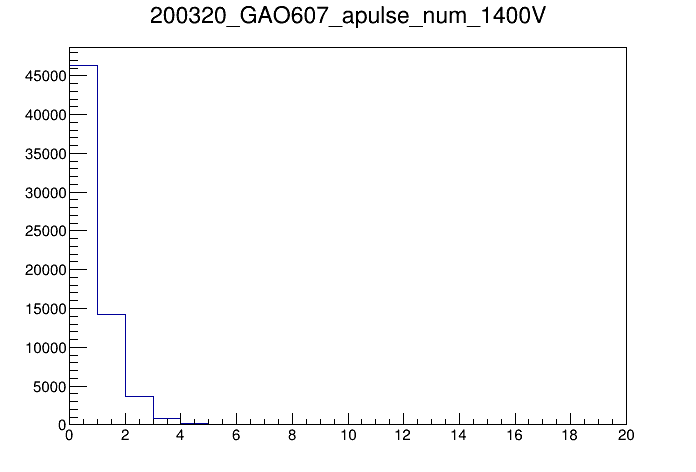

In [238]:
file = ROOT.TFile("/Users/williamquinn/Desktop/SNEMO/200320_A1400_B1400_t0929_output.root")
file.ls()
c2 = ROOT.TCanvas()
hist = file.Get("200320_GAO607_apulse_num_1400V")
c2.cd()
hist.Draw()
c2.Draw()

In [242]:
x = []
y = []
for i_bin in range(1, hist.GetNbinsX()+1):
    x.append(i_bin - 1)
    y.append(hist.GetBinContent(i_bin))
x = np.array(x)
y = np.array(y)

print(len(x), len(y))

20 20


(0.0, 21.0)

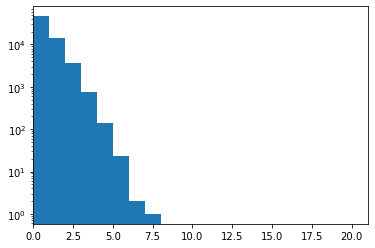

In [220]:
plt.bar(x + 0.5, y, width=1)
plt.yscale('log')
plt.xlim(0,21)

In [246]:
y_reshape = y.reshape((y.size,1))
# M = np.linalg.inv(rows.T)
Mi = rows.T
# new_y = M @ y_reshape

In [247]:
print(new_y-y_reshape)
plt.bar(x + 0.5, y/np.sum(y), width=1, alpha = 0.2)
plt.bar(x + 0.5, new_y.reshape(-1)/np.sum(new_y.reshape(-1)), width = 1, alpha=0.2)
plt.yscale('log')
plt.xlim(0,10)

ValueError: operands could not be broadcast together with shapes (13,1) (20,1) 

In [248]:
def model(x, mu, sig, A):
    y = A*np.exp(-(x-mu)**2/(2*sig**2))
    y = Mi@ y
    return y
def gaus(x, mu, sig, A):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

(20,) (20,) (20, 20)
[4.50406516e-16 1.00000000e+00 5.00000000e+04]


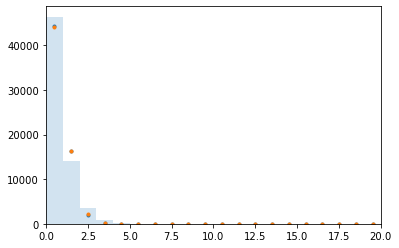

In [253]:
x = np.linspace(0,n-1,n)
print(x.shape, y.shape, Mi.shape)

mus = []
sigs = []
As = []
for i in range():
    for j in range():
        for k in range():
popt, pcov = curve_fit(f=model, xdata=x, ydata=y, p0=[1,1,100000], bounds=[[0,1,50000], [1000,1000,100000]], maxfev=10000)

plt.bar(x + 0.5, y, width=1, alpha = 0.2)
#plt.bar(x + 0.5, new_y.reshape(-1), width=1, alpha=0.2)
plt.plot(x + 0.5, model(x + 0.5, *popt), '.')
plt.plot(x + 0.5, gaus(x + 0.5, *popt), '.')
#plt.yscale('log')
plt.xlim(0,n)
plt.ylim(0)
print(popt)